In [ ]:
import numpy as np
from scipy.signal import wiener
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from cycler import cycle

%matplotlib inline

This example uses matplotlib 2.0

In [2]:
#%matplotlib widget
import sys
print("Python version is {} \n".format(sys.version))
print("Matplotlib version is {} \n".format(mpl.__version__))
print("Matplotlibrc file is {}\n".format(mpl.matplotlib_fname()))

Python version is 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)] 

Matplotlib version is 3.1.0 

Matplotlibrc file is /Users/markdean/Documents/programs/matplotlib_examples/matplotlibrc



and the matplotlibrc file from 
https://github.com/mpmdean/matplotlibrc
please suggest improvements

## A few notes

* All fields are using latex by default -- this avoid non-uniformity when using latex in some labels. 

* Using a uniform style is very important for an attractive manuscript. Try to avoid ad-hoc changes to the settings. 

* If you feel that there is a desirable change, consider applying it to the whole manuscript, preferably by setting some edits to the rc file right at the start of the script/notebook. e.g. mpl.rc('font', size=10). 

## Create figure

* The width of a figure should always be set to the real physical column width. e.g. 3+3/8 inches for a PRL column. This will mean that fonts appear on the page in the correct size.

* Gridspec and subplots_adjust are useful to set the precise location of panels.

* Including 2-4 minor ticks per major tick is usually good.

* Saving in pdf creates vector graphics and fast performance within pdflatex.

In [3]:
def set_minors(ax):
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

x = np.linspace(-0.5, 1.2, 50)

y = 9/((x/.1)**2 +1) + 5/(((x-.6)/.2)**2 +1)

ys_top_left_off = [y+1*np.random.rand(x.size) for _ in range(6)]
ys_top_left_on = [.8*(y+np.random.rand(x.size)) for y in ys_top_left_off]

ys_top_left_off_fit = [wiener(y, 5) for y in ys_top_left_off]
ys_top_left_on_fit = [wiener(y, 5) for y in ys_top_left_on]

In [4]:
plt.rc('lines', markersize=1)
plt.rc('font', size=10)
plt.rc('legend', numpoints=1)

In [15]:
def to_ax_array(gs):
    I, J = gs.get_geometry()
    return np.array([[plt.subplot(gs[i, j]) for j in range(J)]
                     for i in range(I)])

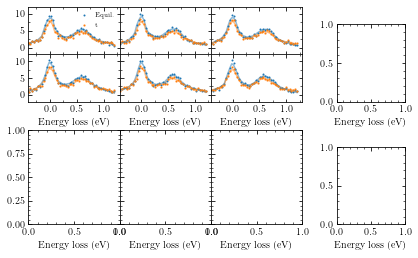

In [38]:
fig = plt.figure(figsize=(6+3/4, 4))

gs = plt.GridSpec(2, 2, width_ratios=[.8, .2], hspace=0.3, figure=fig)

axs_top_left = to_ax_array(gs[0, 0].subgridspec(2, 3, wspace=0, hspace=0))
ax_top_right = plt.subplot(gs[0, 1].subgridspec(2, 1, height_ratios=[.1, .9])[1])
axs_bottom_left = to_ax_array(gs[1, 0].subgridspec(1, 3, wspace=0, hspace=0))
ax_bottom_right = plt.subplot(gs[1, 1].subgridspec(2, 1, height_ratios=[.1, .9])[1])


ax_data = zip(axs_top_left.ravel(), ys_top_left_on, ys_top_left_off,
             ys_top_left_on_fit, ys_top_left_off_fit)
for ax, y_on, y_off, y_on_fit, y_off_fit  in ax_data:
    l = ax.plot(x, y_off, 'o', label='Equil.')
    ax.plot(x, y_off_fit, '-', color=l[0].get_color(),
            alpha=0.5, zorder=-1)
    l = ax.plot(x, y_on, 's', label='t')
    ax.plot(x, y_on_fit, '-', color=l[0].get_color(),
            alpha=0.5, zorder=-1)
    
    ax.set_xticks(np.arange(-.5, 1.2, .5))
    ax.set_yticks(np.arange(0, 11, 5))
    ax.axis([-.4, 1.3, -2, 12])
    set_minors(ax)


# remove y ticklabels
for ax in np.hstack((axs_top_left[:, 1:].ravel(),
                     axs_bottom_left[:, 1:].ravel())):
    ax.set_yticklabels([])
    
# add ylabels
for ax in np.hstack((axs_top_left[1, :].ravel(),
                     axs_bottom_left.ravel(),
                     np.array([ax_top_right]),
                     np.array([ax_bottom_right]),
                    )):
    ax.set_xlabel('Energy loss (eV)')
    
# remove xlabels
for ax in axs_top_left[0, :].ravel():
    ax.set_xticklabels([])

    
axs_top_left[0, 0].legend(fontsize=6, frameon=False)

In [39]:
fig.savefig('ex_16_multipanel.pdf', dpi=600)